In [2]:
from individual import *
from genetic import SymbolicMaximizer
from data import *
import graphviz
import pickle
import time

In [3]:
df, df_normalized = BTC_1d_Dataset(zscore=False)

In [ ]:
df

In [4]:
features = df_normalized.columns[:-1]

dataset = np.array(df_normalized[:-365])
test = np.array(df_normalized[-365:])

function_set = default_function_set()

In [5]:
dataset.shape

(1615, 19)

In [6]:
path = 'models/BTC_500p_200g_close_elitism.pkl'
with open(path, 'rb') as f:
    gp = pickle.load(f)

In [7]:
gp._program.raw_fitness_

2025.6142156991434

In [8]:
length_buy_ops = len(gp._program.buy_ops)
len(gp._program.buy_ops), len(gp._program.sell_ops)

(51, 51)

In [9]:
gp._program.length_

448

In [11]:
gp._program.buy_ops

[0,
 8,
 13,
 165,
 219,
 240,
 300,
 346,
 397,
 412,
 419,
 428,
 444,
 466,
 694,
 699,
 780,
 790,
 834,
 868,
 920,
 923,
 982,
 996,
 998,
 1000,
 1035,
 1037,
 1050,
 1142,
 1243,
 1268,
 1331,
 1336,
 1338,
 1375,
 1384,
 1388,
 1391,
 1394,
 1403,
 1415,
 1457,
 1462,
 1469,
 1476,
 1479,
 1482,
 1487,
 1501,
 1613]

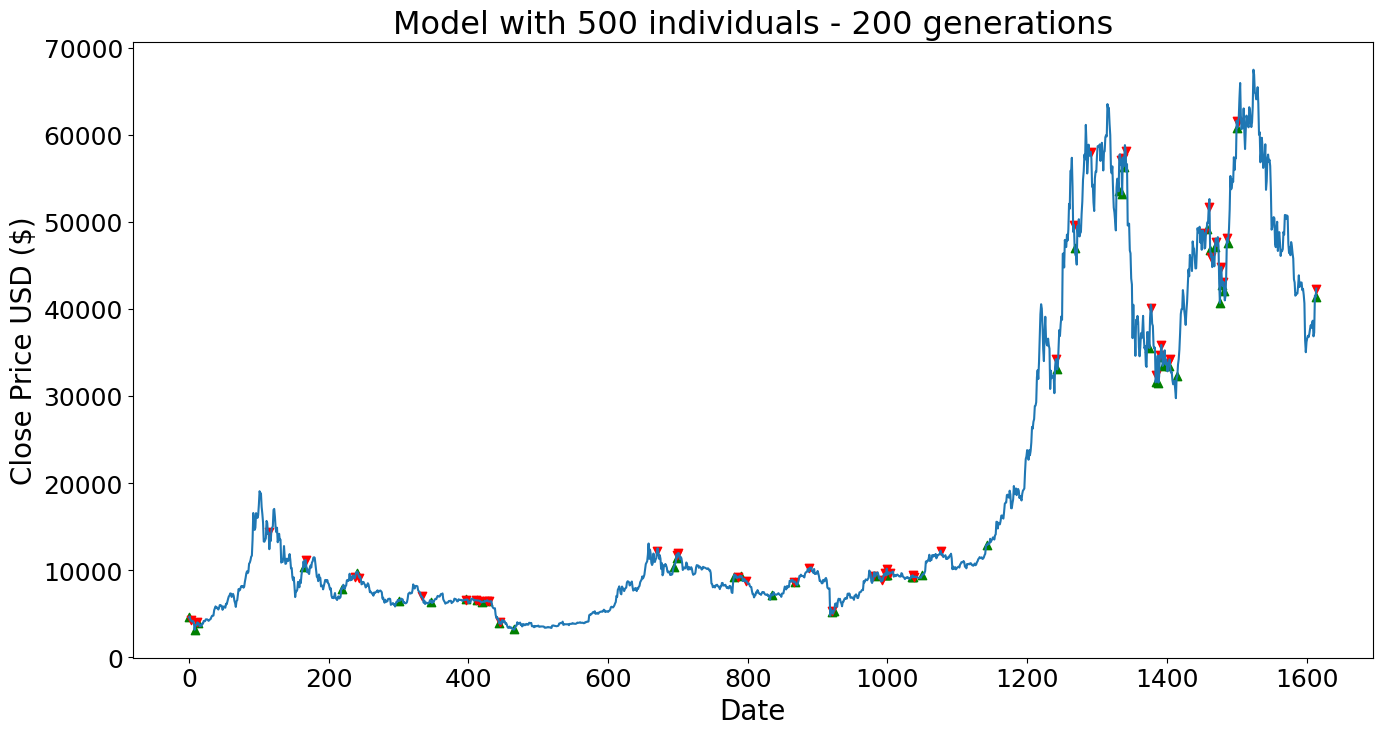

In [14]:
plt.figure(figsize=(16,8))
plt.title('Model with 500 individuals - 200 generations', fontsize=23)
plt.plot(dataset[:,-1])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plot a buy signal
plt.scatter(gp._program.buy_ops, dataset[:,-1][gp._program.buy_ops], color='green', label='Buy', marker='^', alpha=1)
# plot a sell signal
plt.scatter(gp._program.sell_ops, dataset[:,-1][gp._program.sell_ops], color='red', label='Sell', marker='v', alpha=1)
plt.show()

In [130]:
gp._program.raw_fitness(100, test)

0

In [104]:
# calculate the profit from buy and sell operations
def calculate_profit(buy_ops, sell_ops, data, init_investment=100):
    investment = init_investment
    for i in range(len(buy_ops)):
        buy_price = data[buy_ops[i], -1]
        sell_price = data[sell_ops[i], -1]
        print('Buy at: ', buy_price, '. Sell at: ', sell_price, '. Capital: ', investment, '. Profit: ', investment/buy_price*sell_price - investment)
        investment = investment / buy_price * sell_price
    return investment

In [131]:
investment = calculate_profit(gp._program.buy_ops[length_buy_ops:], gp._program.sell_ops[length_buy_ops:], test, init_investment=1)
investment

Buy at:  43839.99 . Sell at:  42053.66 . Capital:  1 . Profit:  -0.040746587761539055
Buy at:  37008.16 . Sell at:  38230.33 . Capital:  0.959253412238461 . Profit:  0.031678709312634834
Buy at:  37250.01 . Sell at:  39219.17 . Capital:  0.9909321215510958 . Profit:  0.05238398315795223
Buy at:  39116.72 . Sell at:  39671.37 . Capital:  1.043316104709048 . Profit:  0.014793553178203078
Buy at:  39280.33 . Sell at:  41262.11 . Capital:  1.058109657887251 . Profit:  0.05338398526203303
Buy at:  44313.16 . Sell at:  42252.01 . Capital:  1.1114936431492841 . Profit:  -0.05169920453827137
Buy at:  40074.94 . Sell at:  40551.9 . Capital:  1.0597944386110127 . Profit:  0.012613357760233868
Buy at:  40378.71 . Sell at:  39678.12 . Capital:  1.0724077963712466 . Profit:  -0.018606790015325725
Buy at:  41493.18 . Sell at:  39450.13 . Capital:  1.0538010063559209 . Profit:  -0.05188727752453448
Buy at:  38112.65 . Sell at:  38596.11 . Capital:  1.0019137288313864 . Profit:  0.012709302851961812
B

0.6778771326480073

In [107]:
# BTC_500p_200g_close - Fitness:  - Test_fitness: 
# BTC_500p_200g_close_elitism - Fitness: 2025.61 - Test_fitness: 67.78
# BTC_500p_200g_zscore - Fitness: 720.81 - Test_fitness: 65.77
# BTC_500p_200g_zscore_elitism - Fitness: 997.16 - Test_fitness: 52.42

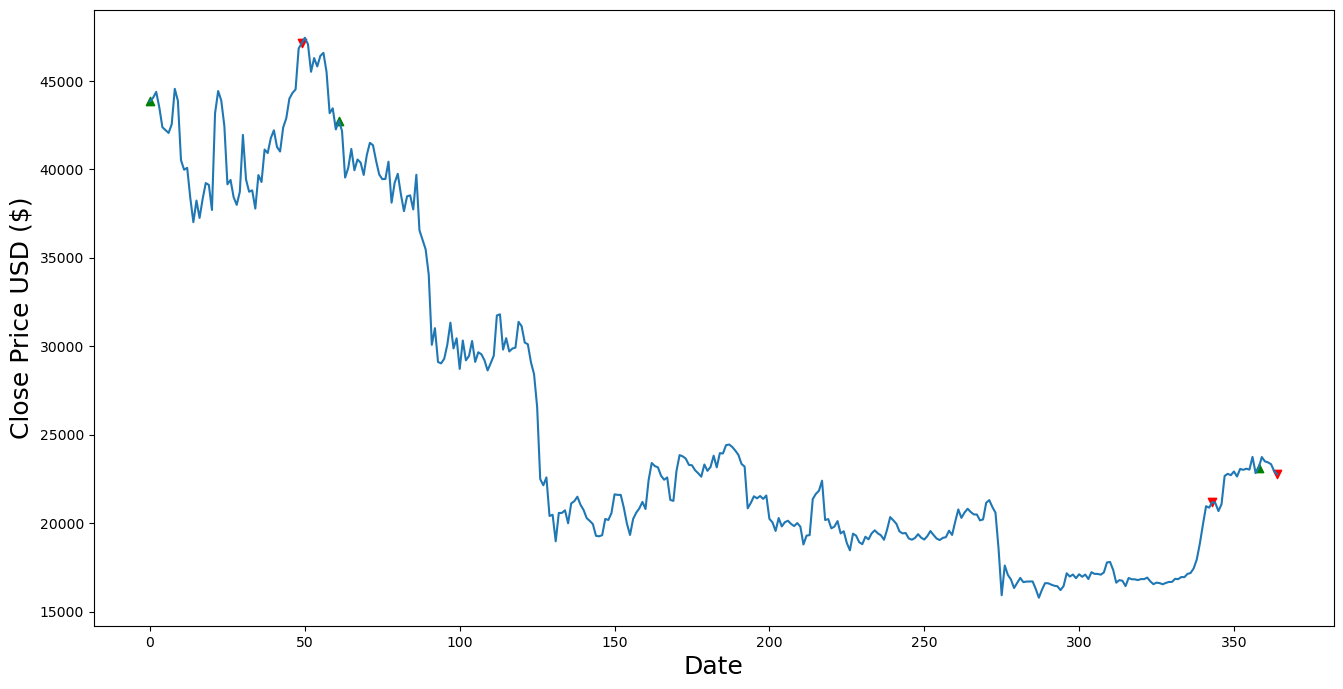

In [86]:
plt.figure(figsize=(16,8))
plt.plot(test[:, -1])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
# plot a buy signal
plt.scatter(gp._program.buy_ops[length_buy_ops:], test[gp._program.buy_ops[length_buy_ops:],-1], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(gp._program.sell_ops[length_buy_ops:], test[gp._program.sell_ops[length_buy_ops:],-1], color='red', label='Sell', marker='v', alpha=1)
plt.show()